<a href="https://colab.research.google.com/github/AlexeyTri/MLScratch/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

расчет тлогарифма правдоподобия

In [31]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_param = lambda_param
        self.w = None
        self.b = None



    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initial w, b
        self.w = np.zeros(n_features)
        self.b = 0

        # initial y_
        # y_real = np.array([1 if i > 0 else -1 for i in y])
        y_real = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_real[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= 2 * self.lr * self.lambda_param * self.w
                else:
                    self.w -=  self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_real[idx]))
                    self.b -= self.lr * y_real[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [32]:
X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
    # predictions = clf.predict(X)

print(clf.w, clf.b)

[0.50477891 0.27392239] -0.8900000000000006


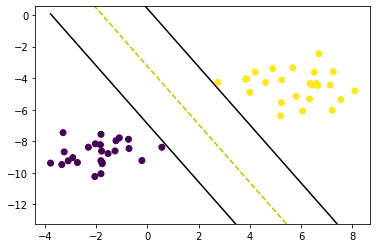

In [36]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()
visualize_svm()